# Normalization

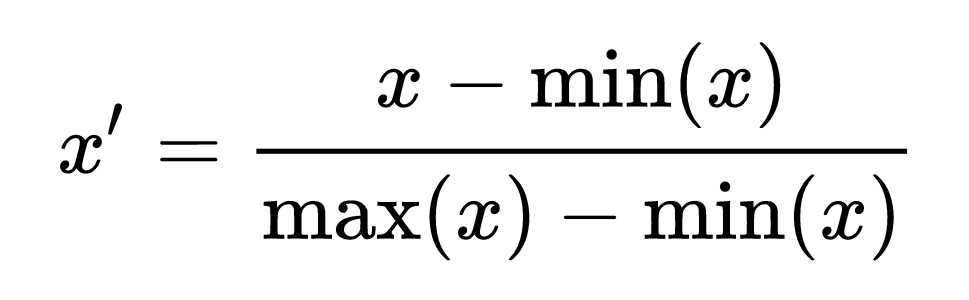

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('Social_Network_Ads.csv')

In [48]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [49]:
df = df.iloc[:,2:]

In [50]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
df.shape

(400, 3)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [7]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

In [40]:
X_train.describe()

,Age,EstimatedSalary
count,282.000000,282.000000
mean,38.148936,69138.297872
std,10.976154,35357.734907
min,5.000000,1000.000000
25%,30.000000,43000.000000
50%,37.000000,68000.000000
75%,46.000000,86750.000000
max,90.000000,250000.000000


In [52]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max.fit(X_train)

X_train_scaled = min_max.transform(X_train)
X_test_scaled = min_max.transform(X_test)

In [53]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns= X_test.columns)

In [54]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [55]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,0.472959,0.405979
std,0.243290,0.256601
min,0.000000,0.000000
25%,0.285714,0.207407
50%,0.452381,0.411111
75%,0.666667,0.540741
max,1.000000,1.000000


# Effect of Normaization

In [56]:
import warnings
warnings.filterwarnings('ignore')

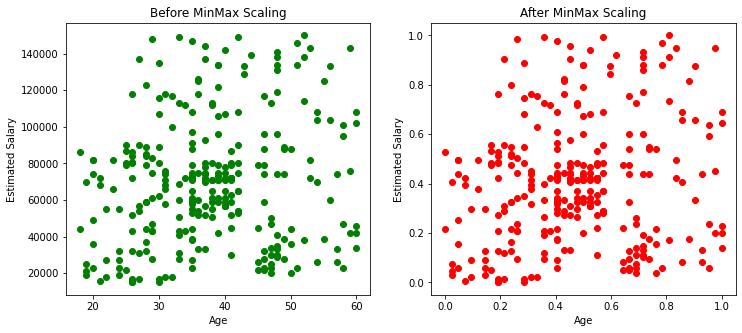

In [57]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize= (12,5))

ax1.scatter(X_train['Age'] , X_train['EstimatedSalary'] , color = 'green')
ax1.set_title('Before MinMax Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')

ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'] , color = 'red')
ax2.set_title('After MinMax Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')


fig.show()

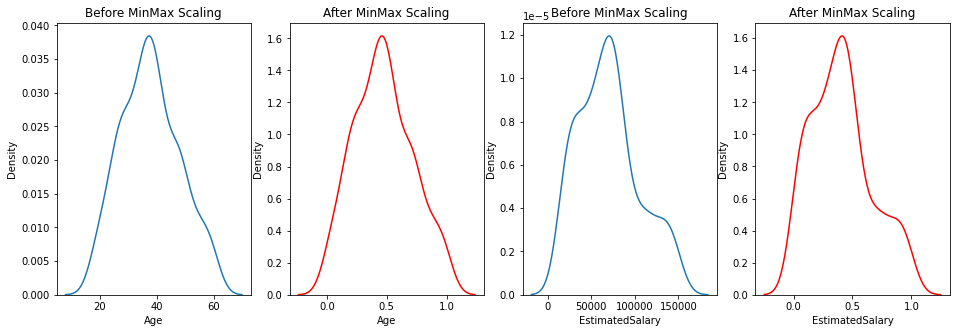

In [58]:
fig, (ax1, ax2, ax3 , ax4) = plt.subplots(ncols=4,figsize=(16, 5))

# before scaling
ax1.set_title('Before MinMax Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('After MinMax Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2,  color='red')


# before scaling
ax3.set_title('Before MinMax Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax3)


# after scaling
ax4.set_title('After MinMax Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax4, color='red')
plt.show()

# Effect of Normalization on different algorithms

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn_scaled = KNeighborsClassifier(n_neighbors=5)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree_scaled = DecisionTreeClassifier()


from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_scaled = RandomForestClassifier()

In [60]:
lr.fit(X_train , y_train)
knn.fit(X_train , y_train)
dtree.fit(X_train , y_train)
rf.fit(X_train , y_train)


lr_scaled.fit(X_train_scaled , y_train)
knn_scaled.fit(X_train_scaled , y_train)
dtree_scaled.fit(X_train_scaled , y_train)
rf_scaled.fit(X_train_scaled , y_train)

RandomForestClassifier()

In [61]:
from sklearn.metrics import accuracy_score

print('*'*100)
print()
print("Accuracy before MinMax scaling using Logistic Regression: ",accuracy_score(y_test,lr.predict(X_test)))
print("Accuracy after  MinMax scaling using Logistic Regression: ",accuracy_score(y_test,lr_scaled.predict(X_test_scaled)))
print()
print('*'*100)

print()
print("Accuracy before MinMax scaling using KNN : ",accuracy_score(y_test,knn.predict(X_test)))
print("Accuracy after  MinMax scaling using KNN : ",accuracy_score(y_test,knn_scaled.predict(X_test_scaled)))
print('*'*100)
print()

print()
print("Accuracy before MinMax scaling using Decision Tree : ",accuracy_score(y_test,dtree.predict(X_test)))
print("Accuracy after  MinMax scaling using Decision Tree : ",accuracy_score(y_test,dtree_scaled.predict(X_test_scaled)))
print('*'*100)
print()

print()
print("Accuracy before MinMax scaling using Random Forest : ",accuracy_score(y_test,rf.predict(X_test)))
print("Accuracy after  MinMax scaling using Random Forest : ",accuracy_score(y_test,rf_scaled.predict(X_test_scaled)))
print('*'*100)
print()

****************************************************************************************************

Accuracy before MinMax scaling using Logistic Regression:  0.6583333333333333
Accuracy after  MinMax scaling using Logistic Regression:  0.8416666666666667

****************************************************************************************************

Accuracy before MinMax scaling using KNN :  0.825
Accuracy after  MinMax scaling using KNN :  0.9166666666666666
****************************************************************************************************


Accuracy before MinMax scaling using Decision Tree :  0.875
Accuracy after  MinMax scaling using Decision Tree :  0.875
****************************************************************************************************


Accuracy before MinMax scaling using Random Forest :  0.9
Accuracy after  MinMax scaling using Random Forest :  0.925
**********************************************************************************

In [33]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

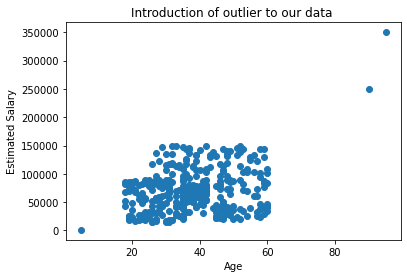

In [39]:
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.title("Introduction of outlier to our data ")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [36]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max.fit(X_train)

X_train_scaled = min_max.transform(X_train)
X_test_scaled = min_max.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled , columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns= X_test.columns)


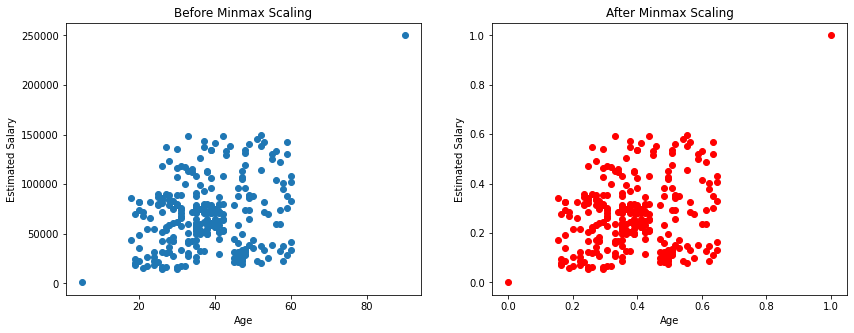

In [38]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(X_train['Age'], X_train['EstimatedSalary'])
plt.title("Before Minmax Scaling")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
plt.title("After Minmax Scaling")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

# Observations

- MinMax Scaling is one of the feature scaling techniques,it transforms features by subtracting from the minimum data and dividing by (maximum - minimum) data.
- The resulting data will have the minimum value of 0 and maximum of 1
- The scatter plots and distplots above shows that there will be no change in the distribution of data before and after applying the standard scaler, only the scale changes.
- The accuracy of Logistic regression and KNN increased significantly after scaling.
- But there was no effect on accuracy when the decision tree and Random Forest was used.
- Outlier in the dataset will still remain as an outlier even after applying the standard scaling, we need to take care of the outlier by different methods.
- It is normally suggested to use min max scaler when the distribution of the data is well known